In [21]:
from detr_config import Config
from detr_factory import DETRFactory
from detr_file_manager import FileManager
from detr_metrics import MetricsAggregator, metrics_names
import matplotlib.pyplot as plt
import numpy as np


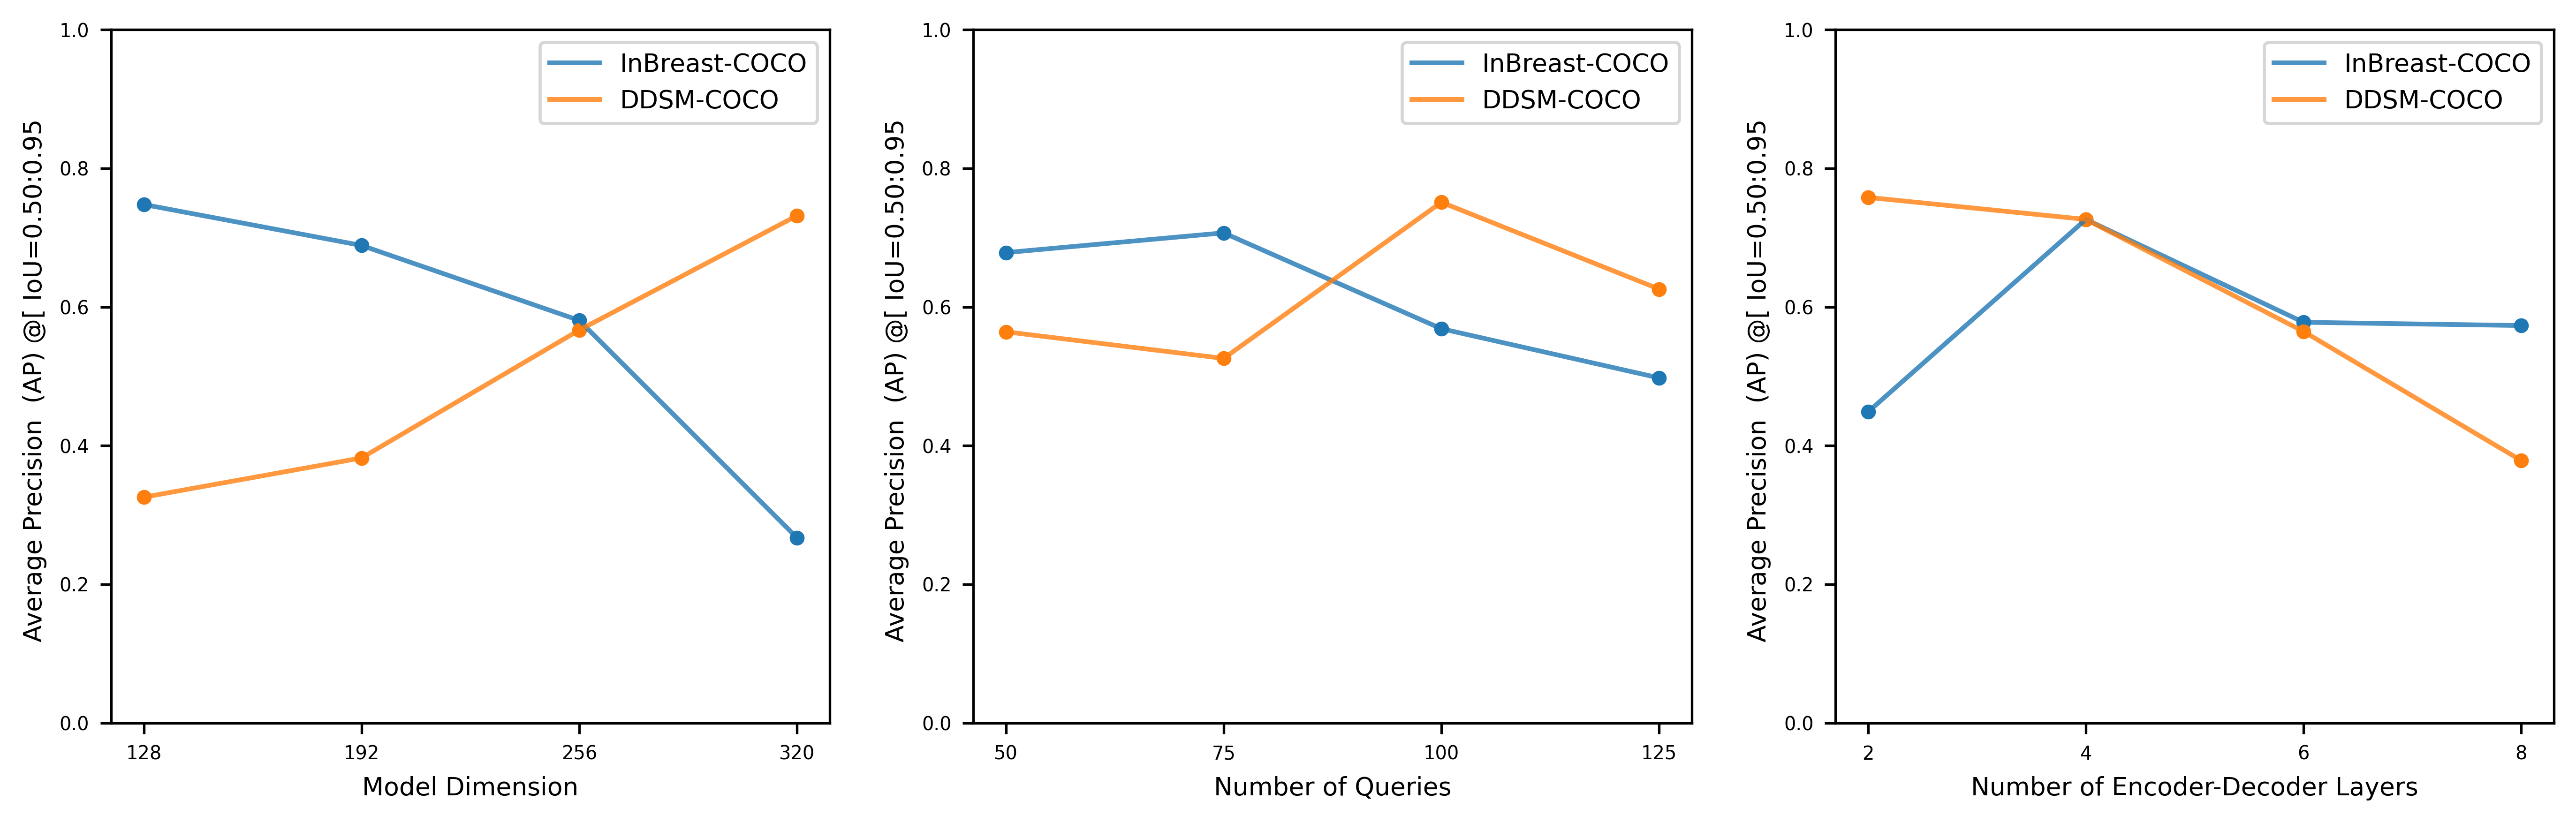

In [54]:
Config.set_benchmark_settings()
Config.LOGS_DIR = '../Otros/lightning_logs_plots/'

datasets = [
    'InBreast-COCO',
    'DDSM-COCO'
]

hyperparam_lists = {
    'Model Dimension':
    [
        ('D-DETR', 128, 100, 6),
        ('D-DETR', 192, 100, 6),
        ('D-DETR', 256, 100, 6),
        ('D-DETR', 320, 100, 6),
    ],
    'Number of Queries':
    [
        ('D-DETR', 256, 50, 6),
        ('D-DETR', 256, 75, 6),
        ('D-DETR', 256, 100, 6),
        ('D-DETR', 256, 125, 6),
    ],
    'Number of Encoder-Decoder Layers':
    [
        ('D-DETR', 256, 100, 2),
        ('D-DETR', 256, 100, 4),
        ('D-DETR', 256, 100, 6),
        ('D-DETR', 256, 100, 8),
    ],
}

mAP_col = metrics_names[0]
ylabel = mAP_col.split("|")[0]

fig, axes = plt.subplots(1, 3, figsize=(14,4), dpi=480)

for i, (xlabel, hyperparam_list) in enumerate(hyperparam_lists.items()):
    ax = axes[i]
    
    for dataset in datasets:
        
        mAP_list = []
        param_list = []
        
        for hyperparams in hyperparam_list:

            detr_factory = DETRFactory(*hyperparams)    
            file_manager = FileManager(detr_factory)
            metrics_aggregator = MetricsAggregator(file_manager)
            metrics = metrics_aggregator.load_metrics()
            metrics[mAP_col] = metrics[mAP_col] + np.random.uniform(0,0.5) # Remove this
            mAP = metrics.loc[0.001][mAP_col]
            param = hyperparams[i+1]
            mAP_list.append(mAP)
            param_list.append(param)
            # break
        
        ax.plot(param_list, mAP_list, label=dataset, alpha=0.8)
        ax.scatter(param_list, mAP_list, s=14)
        ax.legend(fontsize=8)
        
        
        y_ticks = np.round(np.arange(0,1.1,0.2), 1)
        x_ticks = param_list
        
        ax.set_yticks(y_ticks, labels=y_ticks, fontsize=6)
        ax.set_xticks(x_ticks, labels=x_ticks, fontsize=6)

        ax.set_xlabel(xlabel, fontsize=8)
        ax.set_ylabel(ylabel, fontsize=8)
